***-----------------------------------------------------WEEK:2 - TASK 01 [ CHURN PREDICTION ]----------------------------------------------------***

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


**Load the dataset using pd.read csv. How many rows and columns are in the dataset?
List the column names. **

In [3]:
df = pd.read_csv("churn_prediction.csv")

In [3]:
df.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


In [4]:
df.shape


(28382, 21)

**Identify missing values. How were missing values handled for gender, dependents,
occupation, and city?**

Answer:

gender: Assumes the most common gender is a reasonable guess for missing values.

dependents:	Filled with 0	Assumes missing means no dependents (interpreted as zero).

occupation:	Filled with 'Unknown'	Creates a new category to handle uncertainty instead of assuming any value.

city:	Filled with mode	Uses the most frequent city, assuming it represents the majority case.


In [5]:
# Check missing values
print(df.isnull().sum())

# Handle missing values:

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64


In [4]:

# Gender - fill with mode (most frequent category)
df['gender'] = df['gender'].fillna(df['gender'].mode()[0])

# Dependents - assuming NaN means no dependents, fill with 0
df['dependents'] = df['dependents'].fillna(0)

# Occupation - create "Unknown" category
df['occupation'] = df['occupation'].fillna('Unknown')

# City - fill with mode or create "Unknown" category
df['city'] = df['city'].fillna(df['city'].mode()[0])

<Axes: xlabel='days_since_last_transaction', ylabel='Count'>

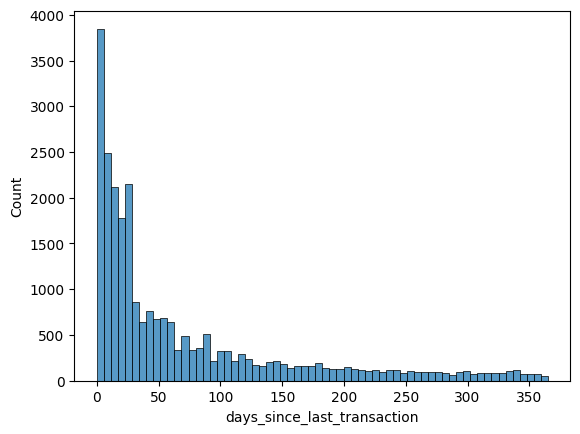

In [ ]:
sns.histplot(df['days_since_last_transaction'])

In [5]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
df[['days_since_last_transaction']] = imputer.fit_transform(df[['days_since_last_transaction']])

In [8]:
df['days_since_last_transaction']


,days_since_last_transaction
0,224.000000
1,60.000000
2,69.997814
3,147.000000
4,58.000000
...,...
28377,70.000000
28378,14.000000
28379,0.000000
28380,69.997814


<Axes: xlabel='days_since_last_transaction', ylabel='Count'>

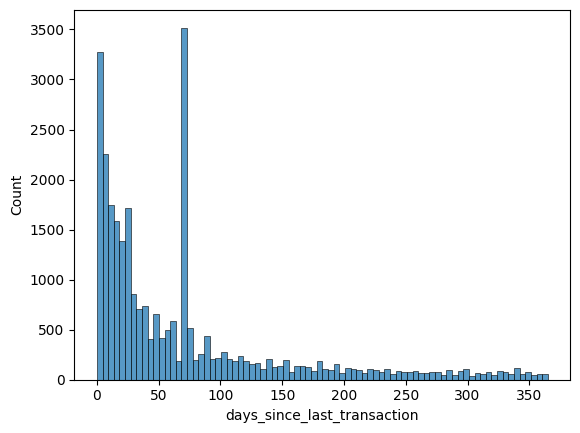

In [9]:
sns.histplot(df['days_since_last_transaction'])

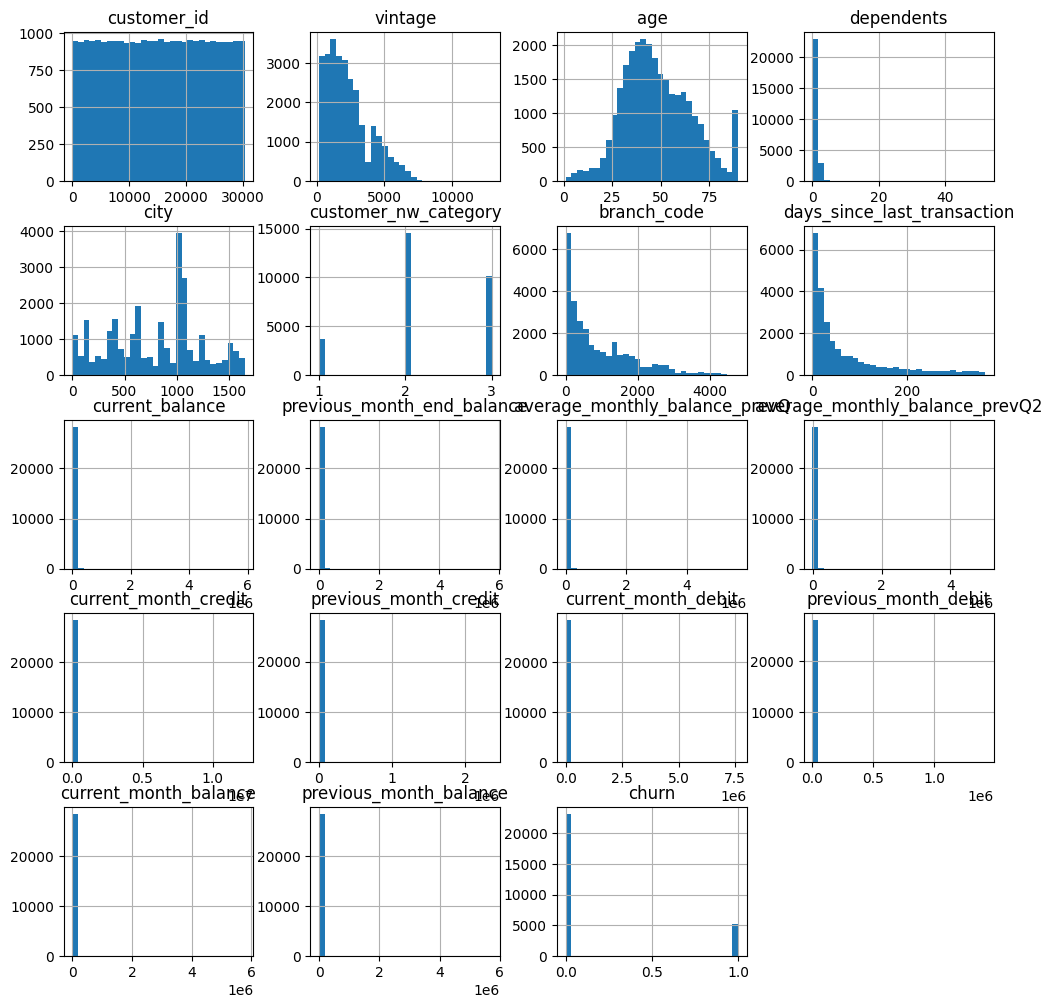

In [6]:
df.hist(bins=30, figsize=(12, 12))
plt.show()

In [11]:
df.isnull().sum()

,0
customer_id,0
vintage,0
age,0
gender,0
dependents,0
occupation,0
city,0
customer_nw_category,0
branch_code,0
days_since_last_transaction,0


In [ ]:
df.shape

(28382, 20)

In [ ]:
df.shape

(28382, 21)

**Apply one-hot encoding to the occupation column. Why is one-hot encoding preferred over label encoding for this feature?**

Why one-hot encoding?

Occupation is a nominal categorical variable without inherent ordering.

Label encoding would imply ordinal relationships between categories that don't exist.

One-hot prevents the model from assuming false relationships between occupation types.




In [6]:
# One-hot encode occupation
from sklearn.preprocessing import OneHotEncoder

# Initialize encoder
ohe = OneHotEncoder(drop='first', sparse_output=False)

# Fit and transform
occ_encoded = ohe.fit_transform(df[['occupation']])

# Convert to DataFrame and concatenate
occ_df = pd.DataFrame(occ_encoded, columns=ohe.get_feature_names_out(['occupation']))
df = pd.concat([df.drop('occupation', axis=1), occ_df], axis=1)



In [14]:
df.shape

(28382, 25)

In [13]:
df.head()

,customer_id,vintage,age,gender,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,...,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,occupation_company,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student
0,1,3135,66,Male,0.0,187.0,2,755,224.000000,1458.71,...,0.20,0.20,1458.71,1458.71,0,0.0,0.0,0.0,1.0,0.0
1,2,310,35,Male,0.0,1020.0,2,3214,60.000000,5390.37,...,5486.27,100.56,6496.78,8787.61,0,0.0,0.0,0.0,1.0,0.0
2,4,2356,31,Male,0.0,146.0,2,41,69.997814,3913.16,...,6046.73,259.23,5006.28,5070.14,0,0.0,0.0,1.0,0.0,0.0
3,5,478,90,Male,0.0,1020.0,2,582,147.000000,2291.91,...,0.47,2143.33,2291.91,1669.79,1,0.0,0.0,0.0,1.0,0.0
4,6,2531,42,Male,2.0,1494.0,3,388,58.000000,927.72,...,588.62,1538.06,1157.15,1677.16,1,0.0,0.0,0.0,1.0,0.0


<Axes: xlabel='churn'>

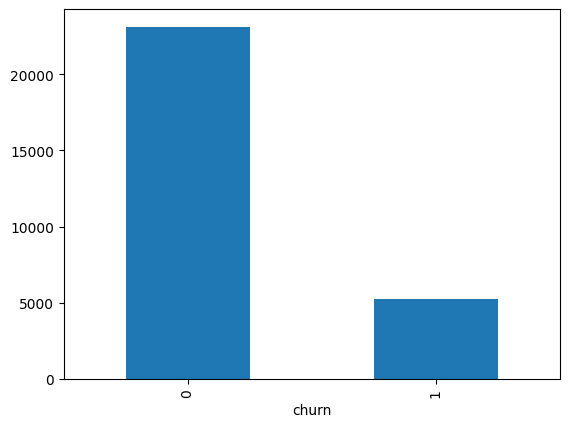

In [ ]:
df['churn'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

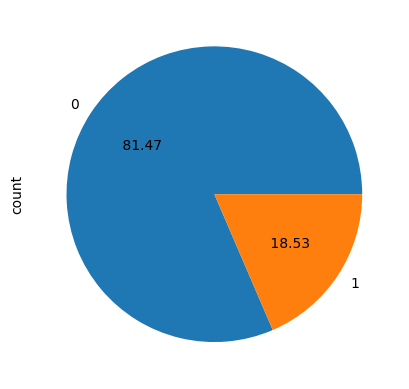

In [ ]:
df['churn'].value_counts().plot(kind='pie', autopct='% .2f')

In [15]:
df['churn'].value_counts()

,count
churn,
0,23122
1,5260


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [8]:
df['gender'] = df['gender'].map({'Male':1,'Female':0})

In [18]:
df.head()

,customer_id,vintage,age,gender,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,...,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,occupation_company,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student
0,1,3135,66,1,0.0,187.0,2,755,224.000000,1458.71,...,0.20,0.20,1458.71,1458.71,0,0.0,0.0,0.0,1.0,0.0
1,2,310,35,1,0.0,1020.0,2,3214,60.000000,5390.37,...,5486.27,100.56,6496.78,8787.61,0,0.0,0.0,0.0,1.0,0.0
2,4,2356,31,1,0.0,146.0,2,41,69.997814,3913.16,...,6046.73,259.23,5006.28,5070.14,0,0.0,0.0,1.0,0.0,0.0
3,5,478,90,1,0.0,1020.0,2,582,147.000000,2291.91,...,0.47,2143.33,2291.91,1669.79,1,0.0,0.0,0.0,1.0,0.0
4,6,2531,42,1,2.0,1494.0,3,388,58.000000,927.72,...,588.62,1538.06,1157.15,1677.16,1,0.0,0.0,0.0,1.0,0.0


In [19]:
df.corr()

,customer_id,vintage,age,gender,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,...,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,occupation_company,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student
customer_id,1.000000,-0.006093,-0.000442,-0.004629,-0.009110,0.000669,0.009618,-0.000286,0.009665,0.006589,...,0.002603,-0.008760,0.005140,0.004553,-0.002723,0.004593,-0.004209,0.002557,0.001342,-0.003035
vintage,-0.006093,1.000000,0.227390,0.039276,0.068588,0.041720,-0.167366,-0.380714,-0.084282,0.002986,...,0.005406,0.023949,0.001638,0.003448,-0.064637,0.035027,0.057813,0.041924,-0.015224,-0.106399
age,-0.000442,0.227390,1.000000,0.089528,0.001261,0.014564,-0.076532,-0.058990,-0.015311,0.054346,...,0.027702,0.033296,0.057662,0.060297,-0.020012,0.045605,0.372942,-0.129008,0.148971,-0.452218
gender,-0.004629,0.039276,0.089528,1.000000,0.176027,0.004317,0.042773,0.068892,-0.073783,0.017821,...,0.015436,0.027415,0.019897,0.018439,0.020537,0.019065,0.116747,0.141181,-0.161204,-0.051610
dependents,-0.009110,0.068588,0.001261,0.176027,1.000000,0.003287,0.007917,-0.001704,-0.082712,-0.003838,...,0.008225,0.030746,-0.002769,-0.001672,0.029335,-0.004590,-0.054831,0.044848,0.038041,-0.088262
city,0.000669,0.041720,0.014564,0.004317,0.003287,1.000000,0.009323,-0.055779,-0.002951,-0.006220,...,0.001231,0.005448,-0.006355,-0.006318,-0.000883,0.002009,-0.004232,0.003649,0.001710,-0.002373
customer_nw_category,0.009618,-0.167366,-0.076532,0.042773,0.007917,0.009323,1.000000,0.235059,0.047040,-0.058314,...,-0.035917,-0.071721,-0.058648,-0.059113,0.006551,0.002814,0.011718,0.040449,-0.023731,-0.037264
branch_code,-0.000286,-0.380714,-0.058990,0.068892,-0.001704,-0.055779,0.235059,1.000000,0.036956,0.000181,...,-0.016944,-0.017584,0.001031,0.002080,0.035469,-0.008184,-0.004395,-0.033180,0.053122,-0.039988
days_since_last_transaction,0.009665,-0.084282,-0.015311,-0.073783,-0.082712,-0.002951,0.047040,0.036956,1.000000,-0.019538,...,-0.039144,-0.070093,-0.017424,-0.011466,-0.053824,0.000798,-0.005629,-0.044127,0.009133,0.060975
current_balance,0.006589,0.002986,0.054346,0.017821,-0.003838,-0.006220,-0.058314,0.000181,-0.019538,1.000000,...,0.044412,0.081247,0.983412,0.942207,-0.024181,0.000772,-0.006112,0.000760,0.008977,-0.019217


In [9]:
selected_features = [
    'vintage',
    'age',
    'gender',
    'dependents',
    'city',
    'days_since_last_transaction',
    'current_month_balance',
    'current_balance',
    'average_monthly_balance_prevQ',
    'previous_month_debit',
    'occupation_retired',
    'occupation_salaried',
    'occupation_self_employed',
    'occupation_student',
    'churn'

]

filtered_df = df[selected_features]

In [23]:
filtered_df.shape

(28382, 15)

In [22]:
filtered_df.head()

,vintage,age,gender,dependents,city,days_since_last_transaction,current_month_balance,current_balance,average_monthly_balance_prevQ,previous_month_debit,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student,churn
0,3135,66,1,0.0,187.0,224.000000,1458.71,1458.71,1458.71,0.20,0.0,0.0,1.0,0.0,0
1,310,35,1,0.0,1020.0,60.000000,6496.78,5390.37,7799.26,100.56,0.0,0.0,1.0,0.0,0
2,2356,31,1,0.0,146.0,69.997814,5006.28,3913.16,4910.17,259.23,0.0,1.0,0.0,0.0,0
3,478,90,1,0.0,1020.0,147.000000,2291.91,2291.91,2084.54,2143.33,0.0,0.0,1.0,0.0,1
4,2531,42,1,2.0,1494.0,58.000000,1157.15,927.72,1643.31,1538.06,0.0,0.0,1.0,0.0,1


In [10]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = filtered_df[filtered_df['churn'] == 0]
df_minority = filtered_df[filtered_df['churn'] == 1]

df_majority_downsampled = resample(
    df_majority,
    n_samples=int(0.55 * len(df_majority)),  # Keep 2/3 of majority
    random_state=42
)

# Combine minority + downsampled majority
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

# New feature matrix/target
X_under = df_downsampled.drop('churn', axis=1)
y_under = df_downsampled['churn']

In [ ]:
X_under.shape

(17977, 17)

In [ ]:
y_under.shape


(17977,)

**Split the dataset into training (2/3) and validation (1/3) sets with stratify = y all.
Why is stratification important? **


Stratification is important in machine learning and data analysis — especially when splitting data into training and test sets — because it ensures that the distribution of a particular variable (usually the target variable) is preserved across those splits.

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Your selected features

# Stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_under, y_under,
    test_size=0.2,
    random_state=42,
    stratify=y_under
)

**Use StandardScaler and log transformation for numerical columns. Explain why
log transformation was applied to balance features**

Log transformation was used on features whose distributions are right skewed. ['vintage', 'days_since_last_transaction']

In [12]:


# Columns to transform
log_cols = ['vintage', 'days_since_last_transaction']
std_cols = [col for col in X_under.columns if col not in log_cols]

# Define transformations
log_transformer = Pipeline([
    ('log', FunctionTransformer(np.log1p, validate=True))
])

std_transformer = Pipeline([
    ('scaler', StandardScaler())
])

# Combine with ColumnTransformer
preprocessor = ColumnTransformer([
    ('log', log_transformer, log_cols),
    ('std', std_transformer, std_cols)
])

# Apply transformations
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)


In [ ]:
# from sklearn.model_selection import train_test_split





# # X = df.drop(columns=['churn','customer_id','branch_code','current_month_balance','customer_nw_category'], axis=1)
# # y = df['churn']

# X_train, X_val, y_train, y_val = train_test_split(
#     X_under, y_under, test_size=1/3, random_state=42, stratify=y_under
# )

In [44]:
X_under.shape

(17977, 14)

In [45]:
y_under.shape

(17977,)

In [95]:
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_val_scaled = scaler.transform(X_val)

In [96]:
# print(X_train_scaled)


In [46]:
X_train.shape

(14381, 14)

In [47]:
X_test.shape

(3596, 14)

**Train a logistic regression model on the baseline features. List the selected features and
explain their relevance based on EDA insights.**

vintage – Longer tenure, typically less likely to churn

age – Slight influence; older customers may be more stable

gender – Very low impact on churn

dependents – Small positive link; may indicate financial responsibility

city – Very weak influence; minor regional differences

days_since_last_transaction – More recent activity often means lower churn

current_month_balance – Highly correlated with other balance features; may be redundant

current_balance – Indicates financial health and activity

average_monthly_balance_prevQ – Reflects stability in account usage

previous_month_debit – Spending behavior that may signal engagement

occupation_retired – Typically stable customer group

occupation_salaried – Regular income; suggests lower churn risk

occupation_self_employed – May have more variable behavior; moderate churn risk

occupation_student – Possibly lower engagement; variable behavior

churn – Target variable used for prediction

In [13]:
model = LogisticRegression(class_weight={0:1, 1:3}, max_iter=1500)
model.fit(X_train_scaled, y_train)

LogisticRegression(class_weight={0: 1, 1: 3}, max_iter=1500)

In [ ]:
# y_pred = model.predict(X_val_scaled)

In [14]:
y_pred = model.predict(X_test_scaled)

In [15]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,classification_report

In [16]:
acc = accuracy_score(y_test,y_pred)
print(acc)

0.617908787541713


**Generate and interpret the confusion matrix. What are the implications of the recall score?**


Recall measures the ability of a model to identify all relevant (positive) cases:


It tells how many actual positives the model correctly predicted.

In General:

High recall: Few false negatives; most real positives are caught.

Low recall: Many false negatives; real positives are missed.

In Churn Prediction:

High recall means most churners are identified → better chance to retain them.

Low recall means many churners are missed → lost customers and revenue.


In [17]:
cm = confusion_matrix(y_test,y_pred)
print(cm)



[[1418 1126]
 [ 248  804]]


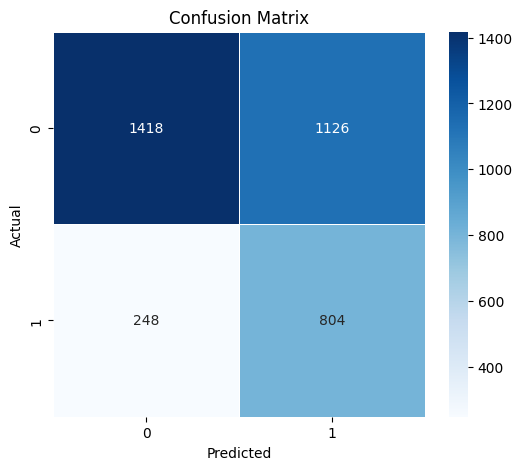

In [18]:
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=0.5)

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [19]:
clr = classification_report(y_test,y_pred)
print(clr)

              precision    recall  f1-score   support

           0       0.85      0.56      0.67      2544
           1       0.42      0.76      0.54      1052

    accuracy                           0.62      3596
   macro avg       0.63      0.66      0.61      3596
weighted avg       0.72      0.62      0.63      3596



**Plot the ROC curve and report the AUC score. What does the AUC indicate about model
performance?**

What AUC Indicates:

AUC = 1.0: Perfect model — ranks all positives higher than all negatives.

AUC = 0.5: No discriminative power — equivalent to random guessing.

AUC < 0.5: Worse than random — the model is likely misclassifying.

Interpretation:

The higher the AUC, the better the model is at separating positive and negative classes.

AUC is threshold-independent, meaning it evaluates performance across all possible classification thresholds.

Example:

If AUC = 0.85, it means:

There's an 85% chance that the model will rank a randomly chosen positive instance higher than a randomly chosen negative one.

It's especially useful for imbalanced datasets, where accuracy might be misleading.

In [20]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class
y_probs = model.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate AUC score
auc_score = roc_auc_score(y_test, y_probs)
print(auc_score)

0.7301994404189682


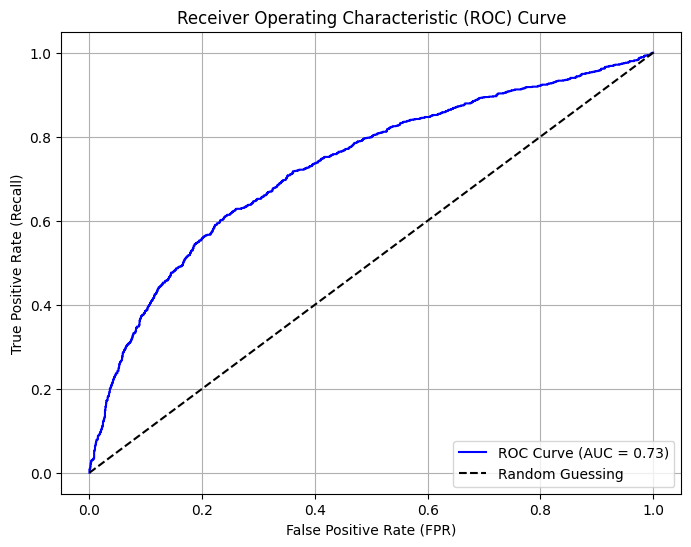

In [21]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

**RANDOM FOREST**

In [22]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [23]:
from sklearn.metrics import precision_recall_curve

# Find threshold for better precision
y_probs = rf.predict_proba(X_test_scaled)[:, 1]
precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)

# Find threshold where precision >= 50% while maintaining recall > 70%
target_idx = np.where((precisions >= 0.5) & (recalls >= 0.7))[0][0]
optimal_threshold = thresholds[target_idx]

# Apply new threshold
y_pred_optimized = (y_probs >= optimal_threshold).astype(int)

In [24]:
y_pred_rf = rf.predict(X_test_scaled)

In [25]:
acc_rf = accuracy_score(y_test,y_pred_optimized)
print(acc_rf)

0.7152391546162402


In [26]:
cm_rf = confusion_matrix(y_test,y_pred_optimized)
print(cm)

[[1418 1126]
 [ 248  804]]


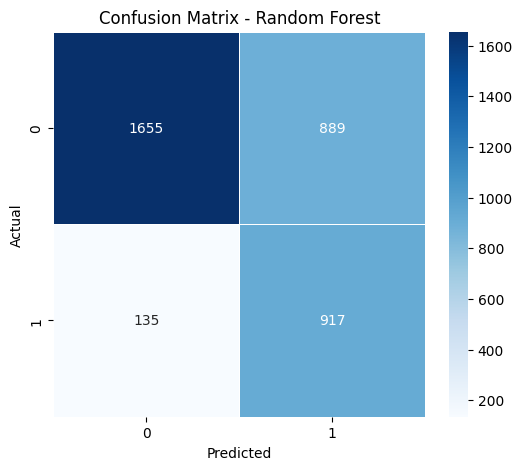

In [27]:
plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', linewidths=0.5)

plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [28]:
clr_rf = classification_report(y_test,y_pred_optimized)
print(clr_rf)

              precision    recall  f1-score   support

           0       0.92      0.65      0.76      2544
           1       0.51      0.87      0.64      1052

    accuracy                           0.72      3596
   macro avg       0.72      0.76      0.70      3596
weighted avg       0.80      0.72      0.73      3596



In [30]:

# Get predicted probabilities for the positive class
y_probs = rf.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate AUC score
auc_score_rf= roc_auc_score(y_test, y_probs)
print(auc_score_rf)

0.8754851869455006


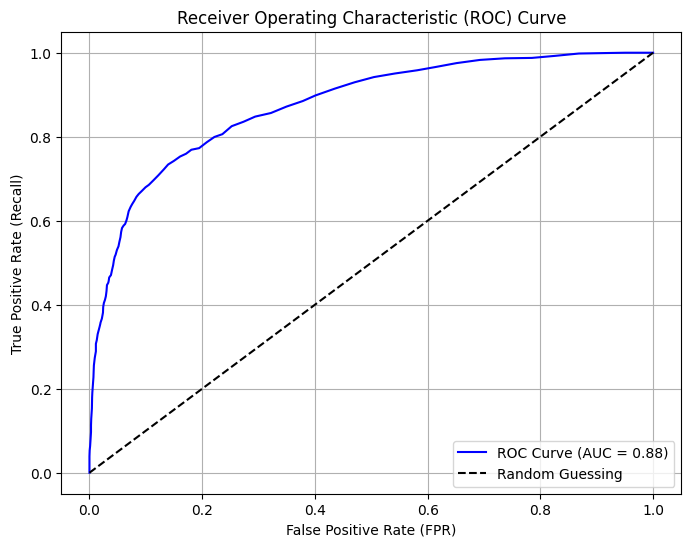

In [31]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

**Save the model using pickle. Why is this step important for reproducibility?**



Why This Step Is Important for Reproducibility:

Reusability: You can reload the exact same model later without retraining.

Consistency: Ensures predictions remain the same across sessions or deployments.

Deployment: Makes it easy to serve the model in a web or production environment.

Efficiency: Saves time and resources by avoiding repeated training.

Auditability: Helps keep a record of which model version was used for which results.

In short, saving with pickle ensures reliable, repeatable, and shareable machine learning workflows.

In [97]:
import pickle

with open('churn_prediction_model.pkl' , 'wb') as file:
  pickle.dump(rf,file)

In [94]:
# test_df = pd.read_csv("churn_prediction.csv")

In [93]:
# test_df.head()

In [92]:
# df.columns

In [91]:
# df['total_credit_2m'] = df['current_month_credit'] + df['previous_month_credit']
# df['total_debit_2m'] = df['current_month_debit'] + df['previous_month_debit']
# df['total_balance_2m'] = df['current_month_balance'] + df['previous_month_balance']

In [90]:
# df['average_balance_prev_6m'] = df[['previous_month_end_balance','average_monthly_balance_prevQ','average_monthly_balance_prevQ2']].mean(axis=1)

In [89]:
# df.shape

In [88]:
# df = df.drop(columns=['previous_month_end_balance','average_monthly_balance_prevQ','average_monthly_balance_prevQ2','current_month_balance','previous_month_balance','current_month_debit','previous_month_debit','current_month_credit','previous_month_credit','customer_nw_category','customer_id'])

In [87]:
# df_test = df.drop(columns=['gender','occupation'])
# # plt.figure(figsize=(15, 12))
# # sns.heatmap(df_test.corr(), annot=True, cmap='coolwarm')
# df_test.corr()

In [86]:
# df.describe()

In [85]:
# categorical = [col for col in df.columns if df[col].dtype == 'object']
# categorical

In [84]:
# df['churn'].value_counts()

In [83]:
# df['churn'].value_counts().plot(kind='bar')


In [82]:
# df['churn'].value_counts().plot(kind='pie', autopct='% .2f')

In [81]:
# df.groupby('branch_code')['churn'].sum()

In [80]:
# df.isnull().sum()

In [79]:
# df.isnull().mean()*100

In [78]:
# columns_with_missing_value = [col for col in df.columns if df[col].isnull().mean()*100 > 0 ]

In [77]:
# columns_with_missing_value

In [75]:
# columns_to_remove=[col for col in df.columns if df[col].isnull().mean()*100 > 0 and df[col].isnull().mean()*100 <= 5]


In [74]:
# columns_to_remove

In [73]:
# df[columns_with_missing_value]

In [72]:
# len(df)

In [71]:
# len(df[columns_with_missing_value].dropna())/len(df)

In [70]:
# df = df.dropna(subset=columns_with_missing_value)


In [ ]:
df.shape

(22067, 21)

In [69]:
# df.hist(bins=30, figsize=(12, 12))
# plt.show()

In [68]:
# sns.scatterplot(x=df['previous_month_balance'], y=df['churn'])

In [67]:

# sns.scatterplot(x=df['current_month_debit'], y=df['churn'])

In [66]:
# sns.scatterplot(x=df['previous_month_debit'], y=df['churn'])

In [65]:
# sns.countplot(x='occupation', hue='churn', data=df)


In [64]:
# churn_rate = df.groupby('gender')['churn'].mean()*100

# churn_rate


In [61]:
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.preprocessing import MinMaxScaler,StandardScaler
# ohe = OneHotEncoder(drop='first', sparse_output=False)

# def customize_dataset(df):
#     # Binary encoding for 'sex' and 'smoker'
#     # df['sex'] = df['sex'].map({'male': 1, 'female': 0})
#     df['gender'] = df['gender'].map({'Male':1,'Female':0})

#     # One-Hot Encode 'region'
#     occupation_encoded = ohe.fit_transform(df[['occupation']])
#     occupation_encoded_df = pd.DataFrame(occupation_encoded, columns=ohe.get_feature_names_out(['occupation']))
#     occupation_encoded_df = occupation_encoded_df.astype(np.int64)
#     occupation_encoded_df.index = df.index

#     # Drop 'region' and join encoded region columns
#     df = df.drop(columns=['occupation'])
#     df = pd.concat([df, occupation_encoded_df], axis=1)


#     return df

In [ ]:
# df['gender'] = df['gender'].map({'Male':1,'Female':0})

In [ ]:
# test_df = customize_dataset(test_df)

In [62]:
# test_df.head()

In [60]:
# df.tail()

In [59]:
# sns.histplot(df['dependents'])

In [58]:
# df.isnull().sum()

In [57]:
# df['dependents'].isnull().sum()

In [56]:
# df['dependents'].max()

In [55]:
# df['days_since_last_transaction'].sample(15)

In [54]:

# # Gender - fill with mode (most frequent category)
# test_df['gender'] = test_df['gender'].fillna(test_df['gender'].mode()[0])

# # Dependents - assuming NaN means no dependents, fill with 0
# test_df['dependents'] = test_df['dependents'].fillna(0)

# # Occupation - create "Unknown" category
# test_df['occupation'] = test_df['occupation'].fillna('Unknown')

# # City - fill with mode or create "Unknown" category
# test_df['city'] = test_df['city'].fillna(test_df['city'].mode()[0])

In [53]:
# numeric_df = df.select_dtypes(include=['number'])  # keeps only numeric features
# correlations = numeric_df.corr()['churn'].drop('churn')
# print(correlations.sort_values())

In [63]:
# for col in df.columns:
#   if df[col].dtype != 'object':
#     sns.histplot(df[col])

In [ ]:
# X = df.drop(columns=['churn'])
# y = df['churn']

In [ ]:
# X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
# X_train.head()

,customer_id,vintage,age,gender,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,...,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student
8124,8656,4211,50,1,2.0,905.0,2,634,42.0,2443.09,...,0.69,7429.26,403.43,4588.54,2539.44,2719.13,0,1,0,0
7506,7992,2722,68,1,0.0,623.0,2,1021,60.0,4512.99,...,0.16,0.16,0.16,188.73,4512.99,4543.41,1,0,0,0
14333,15299,2301,16,0,0.0,1076.0,3,1246,7.0,4853.67,...,4285.80,0.09,0.09,0.09,3006.38,927.41,0,0,0,1
3877,4133,2628,62,0,0.0,1020.0,3,1333,11.0,8738.96,...,814.74,0.70,1172.13,286.41,8987.14,9124.00,0,0,1,0
17938,19141,5477,65,1,0.0,656.0,2,1383,67.0,1543.86,...,0.31,0.31,0.31,0.31,1543.86,1543.86,1,0,0,0


In [ ]:
# X_train.shape

(17653, 16)

In [ ]:
# y_train.shape

(17653,)

In [ ]:
# X_test.shape

(4414, 13)

In [51]:
#


In [50]:
# for index,column_name in enumerate(X_train.columns):
#   print(f'{index} - {column_name}')

In [48]:
# X_train.isnull().sum()

In [52]:
# X_train.head()

In [ ]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# # numerical_features = ['vintage', 'age', 'city','branch_code','average_balance_prev_6m','total_balance_2m','total_debit_2m','total_credit_2m','current_balance','days_since_last_transaction']

# # # Scale training data
# # X_train_scaled = X_train.copy()

# # X_train_scaled[numerical_features] = scaler.fit_transform(X_train[numerical_features])
# # print(X_train_scaled)

# # # Scale validation data using the same scaler
# # X_test_scaled = X_test.copy()

# # X_test_scaled[numerical_features] = scaler.transform(X_test[numerical_features])
# # print(X_test_scaled)

# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

In [ ]:
# trf1 = ColumnTransformer([
#     ('impute_gender',SimpleImputer(strategy='most_frequent'),[2,4]),
#     ('impute_dependents_and_city',SimpleImputer(),[3,5]),
#     ('impute_daysSince_last_transaction',SimpleImputer(strategy='median'),[8])

# ],remainder='passthrough')

In [ ]:
# #  Step 2: OneHotEncoding (all string or categorical columns)
# trf1 = ColumnTransformer([
#     ('ohe_occupation',OneHotEncoder(drop='first',sparse_output=False),[4]),
# ],remainder='passthrough')

In [ ]:
# trf2 = ColumnTransformer([
#     ('scaling',StandardScaler(), slice(0,None))
# ],remainder='passthrough')

In [ ]:
# trf3 = LogisticRegression(class_weight='balanced')
# # trf4 = DecisionTreeClassifier(class_weight='balanced')

In [ ]:
# pipe = Pipeline([
#     ('trf1',trf1),
#     ('trf2',trf2),
#     ('trf3',trf3),
# ])